In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pertpy as pt
import scanpy as sc

plt.rcParams["figure.figsize"] = (7, 7)
import numpy as np

/home/stereonote/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-ib_yqncw because there was an issue with the default path (/home/stereonote/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/opt/software/miniconda3/envs/pertpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')

In [4]:
ctap_dict = {
    '1125687_Female_12': 'early',
    '1125175_Male_65': 'early',
    '1127662_Female_58': 'late',  # 原注释中662的性别缺失，但数据实际标记为Female
    '1127868_Male_18': 'early',
    '1127781_Male_49': 'early',
    '1174019_Female_70': 'late',
    '1174264_Male_62': 'late',
    '1174369_Female_62': 'late',
    '1175196_Male_16': 'early',
    '1013506_Male_78': 'late',
    '1175793_Male_77': 'late',
    '1175525_Male_71': 'late',
    '1111272_Female_67': 'late',
    '1177557_Male_16': 'healthy',   
    '1177968_Female_65': 'late',
    '1143448_Female_71': 'late',
    '1177671_Female_63': 'late',
    '1178402_Female_83': 'late',
    '1178552_Male_13': 'healthy',   
    '1130425_Female_67': 'late',
    '1182051_Female_71': 'late',
    '1181745_Male_64': 'late',
    '1182992_Male_44': 'early',
    '1179925_Female_43': 'unknown',
    '1184011_Female_66': 'late',
    '1185335_Male_54': 'late',
    '1184859_Female_60': 'late',
    '1184799_Female_64': 'late',
    '1185577_Female_70': 'late',
    '1185896_Female_76': 'late',
    '1185833_Male_70': 'late',
    '1185580_Female_71': 'late',
    '1185962_Female_67': 'late',
    '1185759_Male_26': 'early',
    '1186145_Male_49': 'early',
    '1186600_Male_71': 'late',
    '1186135_Female_64': 'late',
    '1186193_Female_66': 'late'
}

# 使用字典快速映射
adata.obs['stage1'] = adata.obs['sample_all'].map(ctap_dict)

In [5]:
ctap_dict = {
    '1125687_Female_12': 'early',
    '1125175_Male_65': 'early',
    '1127662_Female_58': 'late',  # 原注释中662的性别缺失，但数据实际标记为Female
    '1127868_Male_18': 'early',
    '1127781_Male_49': 'middle',
    '1174019_Female_70': 'late',
    '1174264_Male_62': 'late',
    '1174369_Female_62': 'late',
    '1175196_Male_16': 'early',
    '1013506_Male_78': 'late',
    '1175793_Male_77': 'late',
    '1175525_Male_71': 'late',
    '1111272_Female_67': 'late',
    '1177557_Male_16': 'early',   # 原key为1077557，但value是1177557
    '1177968_Female_65': 'late',
    '1143448_Female_71': 'late',
    '1177671_Female_63': 'late',
    '1178402_Female_83': 'late',
    '1178552_Male_13': 'early',   # 原key为"117"，但value是1178552
    '1130425_Female_67': 'late',
    '1182051_Female_71': 'late',
    '1181745_Male_64': 'late',
    '1182992_Male_44': 'early',
    '1179925_Female_43': 'unknown',
    '1184011_Female_66': 'late',
    '1185335_Male_54': 'late',
    '1184859_Female_60': 'middle',
    '1184799_Female_64': 'late',
    '1185577_Female_70': 'late',
    '1185896_Female_76': 'late',
    '1185833_Male_70': 'late',
    '1185580_Female_71': 'late',
    '1185962_Female_67': 'late',
    '1185759_Male_26': 'middle',
    '1186145_Male_49': 'middle',
    '1186600_Male_71': 'late',
    '1186135_Female_64': 'late',
    '1186193_Female_66': 'late'
}

# 使用字典快速映射
adata.obs['stage2'] = adata.obs['sample_all'].map(ctap_dict)

In [1]:
import scanpy as sc
adata=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')
adata.X=adata.layers['counts'].copy()
subadata=adata[adata.obs['annotation1'].isin(['Osteoblast'])==True]

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tmp/ipykernel_191/2960468365.py:13: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,n_iterations=-1,resolution=1)
IOStream.flush timed out
IOStream.flush timed out


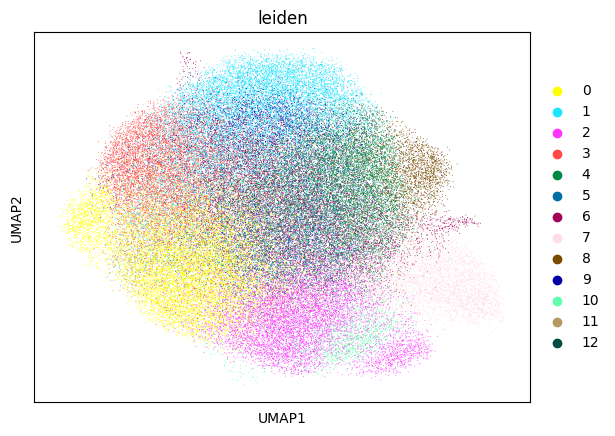

In [2]:
adata=subadata
#adata.X = adata.layers['counts'].copy()  # 直接复制
#adata.X = adata.layers['counts'].tocsr()
ribo_genes = [gene for gene in adata.var_names if gene.startswith(('RPS', 'RPL'))]
adata = adata[:, ~adata.var_names.isin(ribo_genes)]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
#sc.tl.pca(adata,n_comps=50)
sc.pp.neighbors(adata, use_rep="X_scVI")
#sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata,n_iterations=-1,resolution=1)
sc.pl.umap(adata,color="leiden")

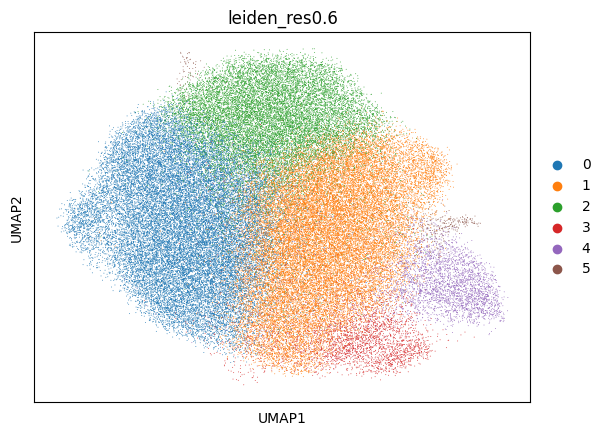

In [3]:
sc.tl.leiden(adata,resolution=0.6,key_added='leiden_res0.6')
sc.pl.umap(adata,color="leiden_res0.6")

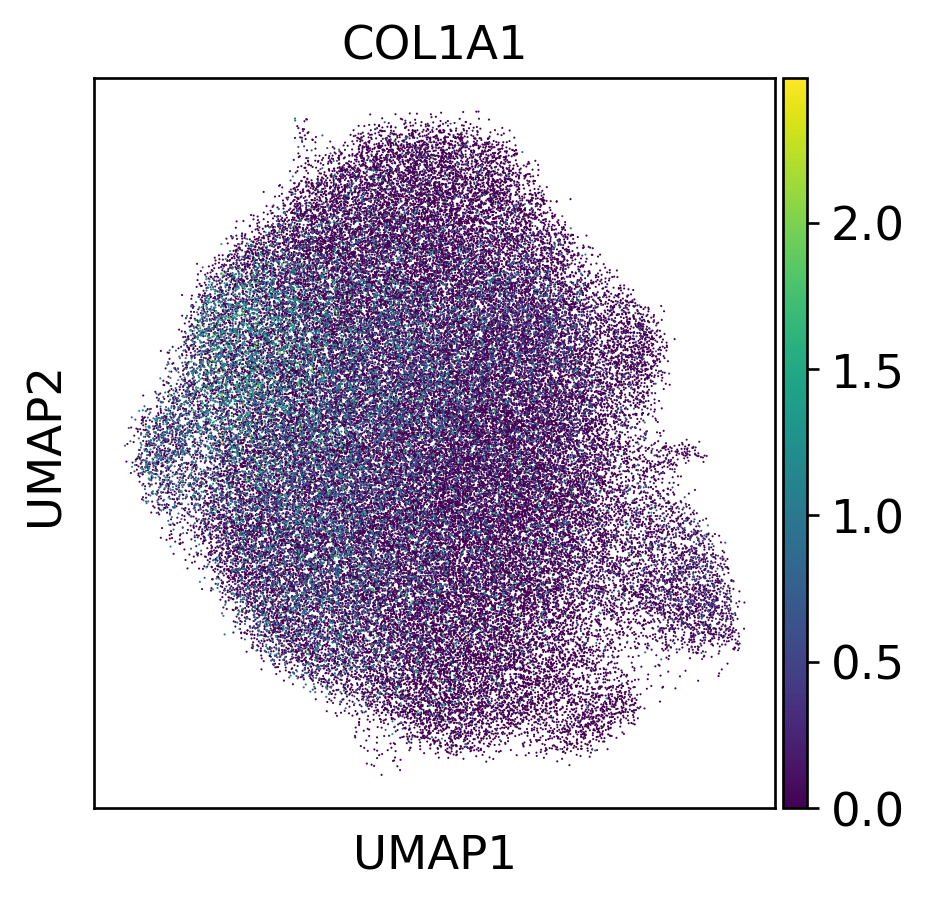

In [7]:
sc.pl.umap(adata,color="COL1A1")


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/
**finished identifying marker genes by COSG**


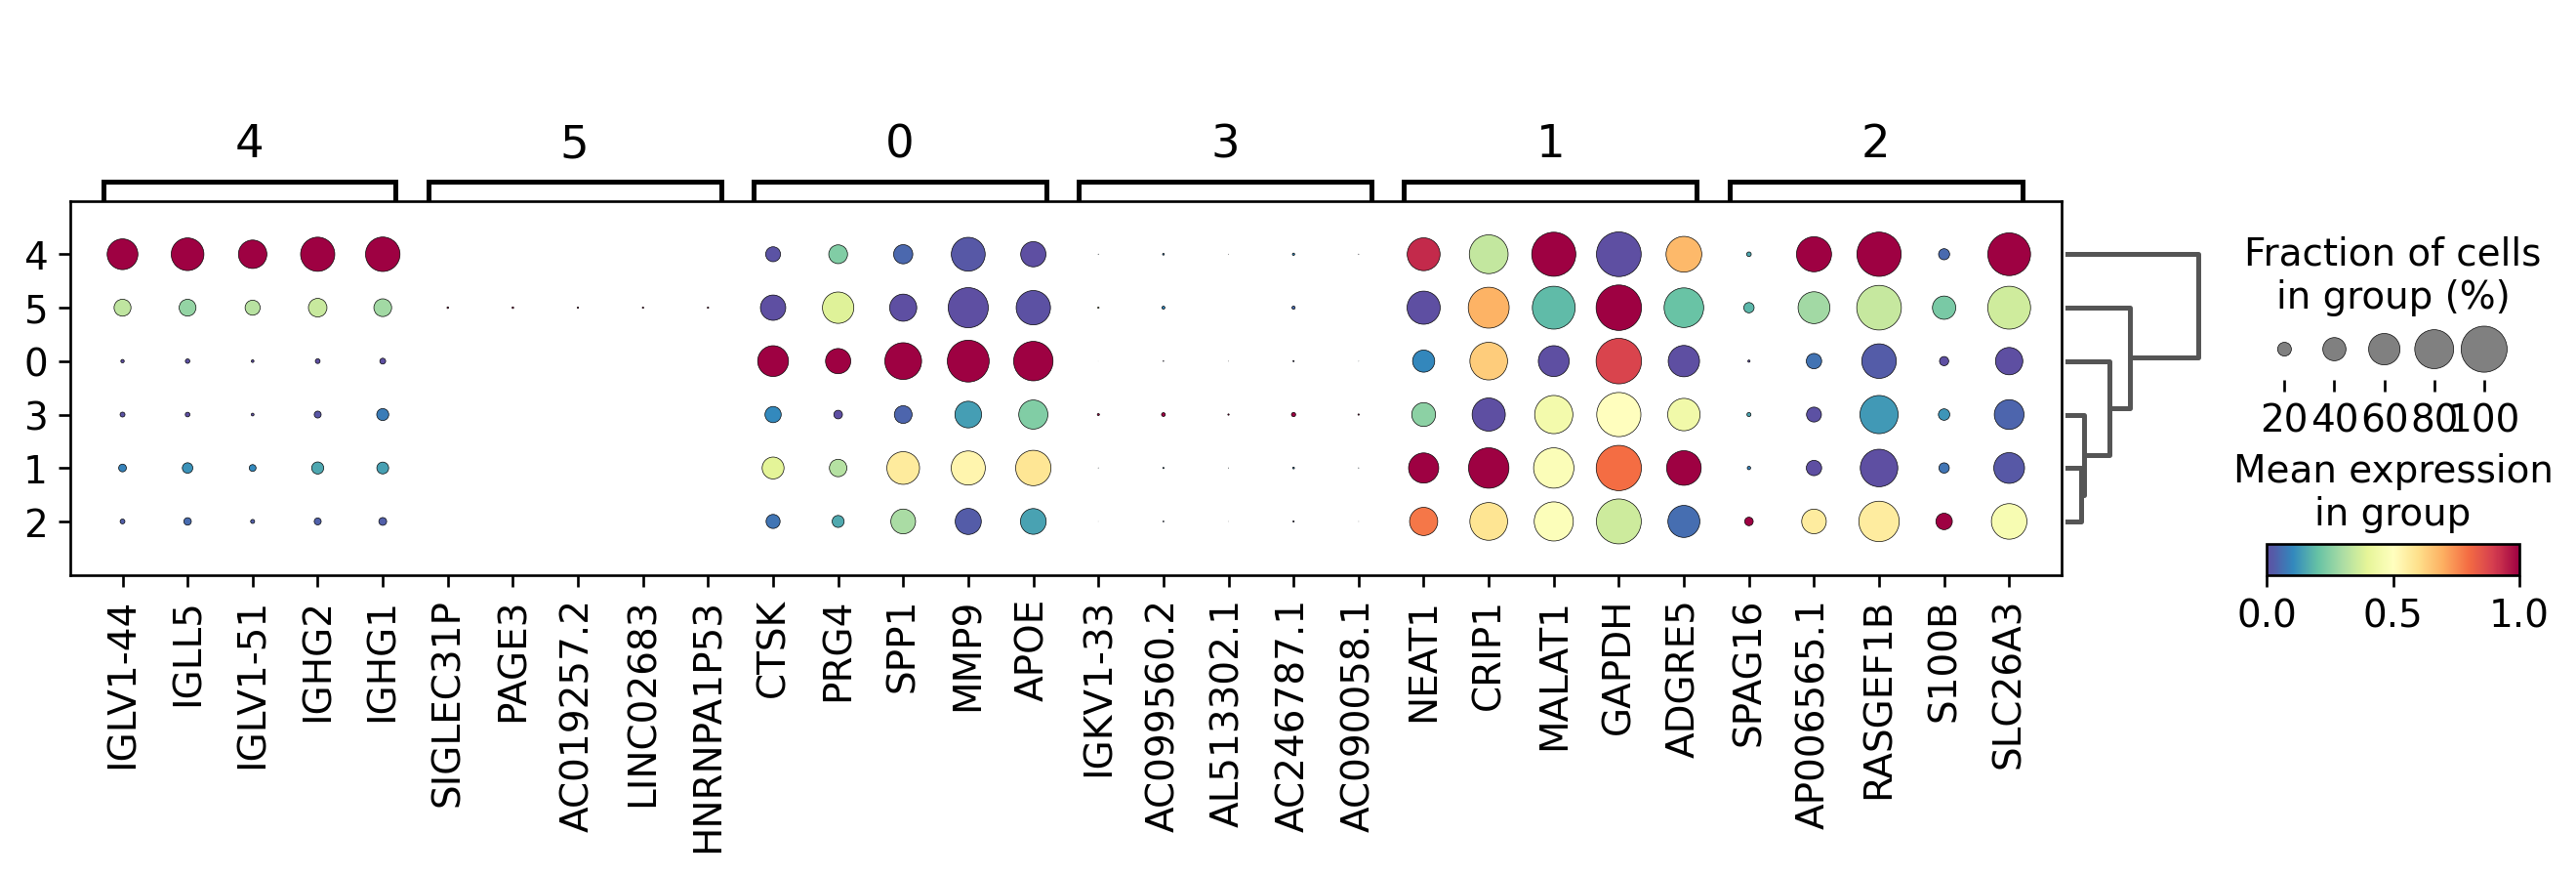

In [6]:
import omicverse as ov
sc.tl.rank_genes_groups(adata, "leiden_res0.6", method="t-test",use_raw=False)
ov.single.cosg(adata, key_added='leiden_cosg', groupby='leiden_res0.6')
sc.pl.rank_genes_groups_dotplot(adata,groupby='leiden_res0.6',
                                cmap='Spectral_r',key='leiden_cosg',
                                standard_scale='var',n_genes=5)

In [8]:
adata.write('/data/work/final/03_anno/Osteoblast/Osteoblast.h5ad')


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/
**finished identifying marker genes by COSG**


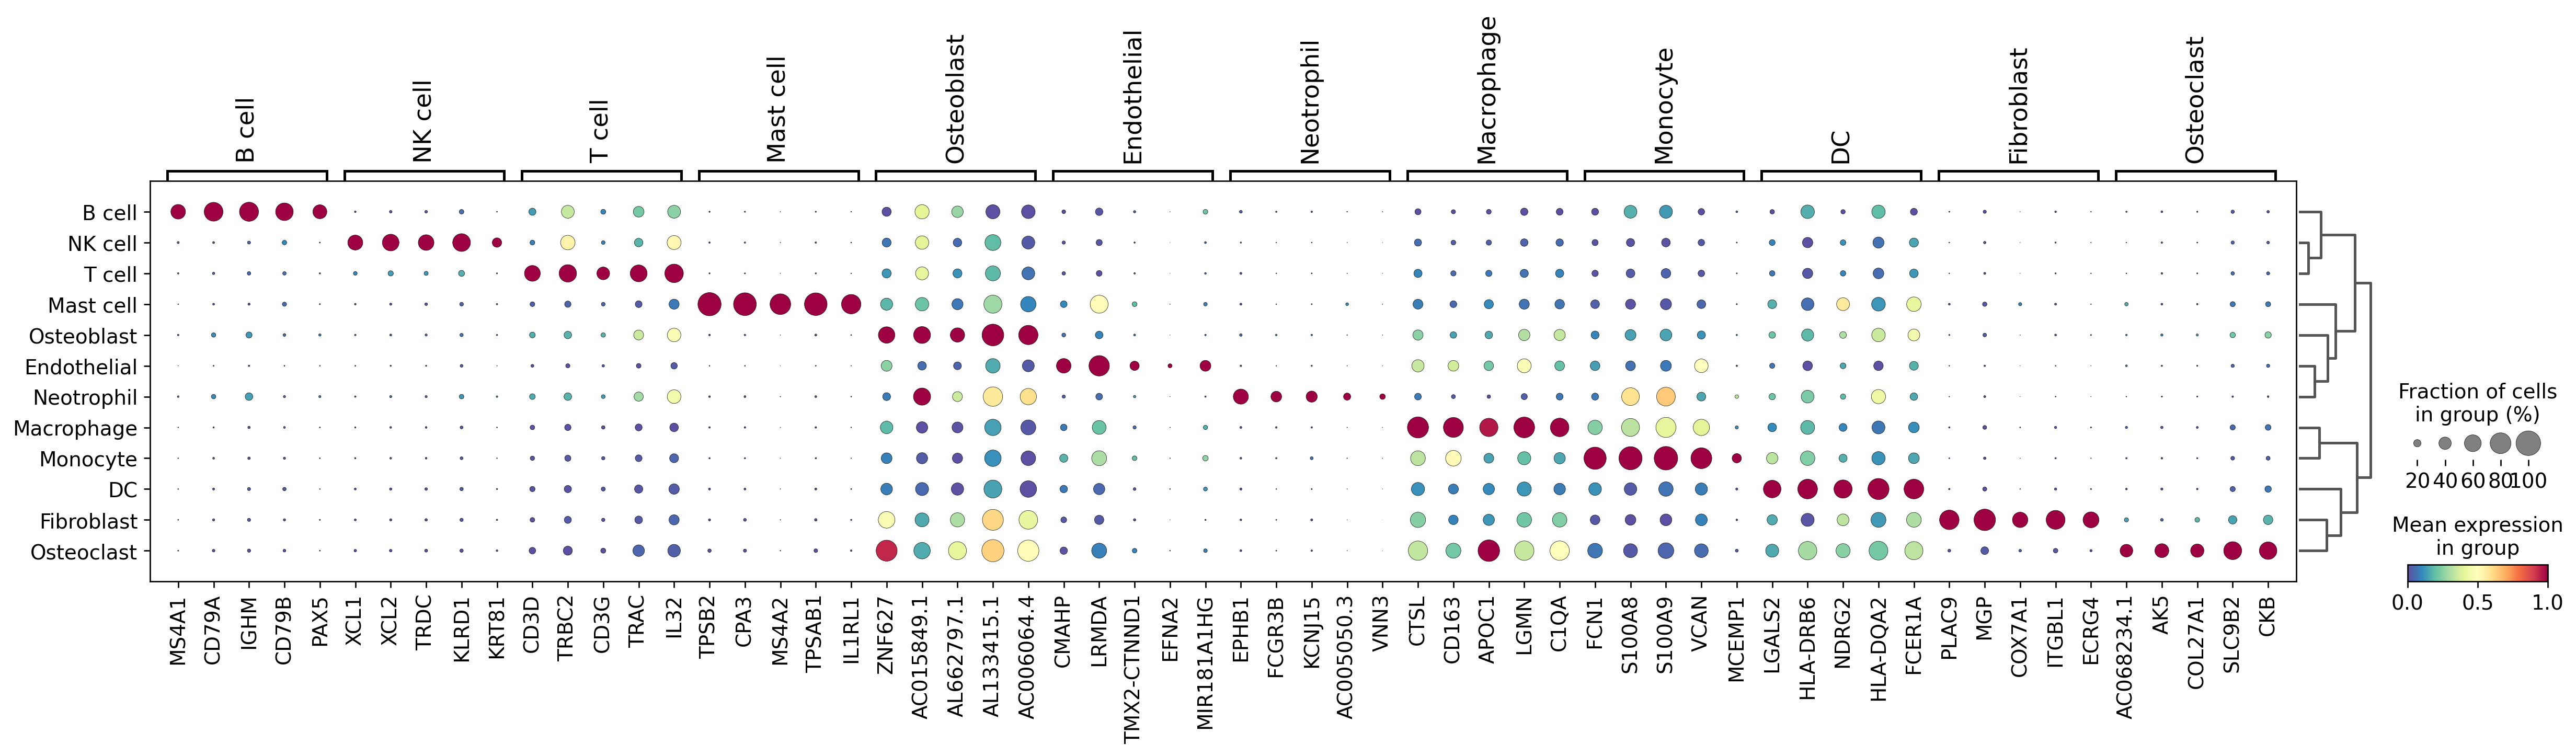

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import omicverse as ov
import numpy as np
adata=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')
adata.uns['log1p']['base']=None
import omicverse as ov
sc.tl.rank_genes_groups(adata, "annotation1", method="t-test",use_raw=False)
ov.single.cosg(adata, key_added='leiden_cosg', groupby='annotation1')
sc.pl.rank_genes_groups_dotplot(adata,groupby='annotation1',
                                cmap='Spectral_r',key='leiden_cosg',
                                standard_scale='var',n_genes=5)

In [3]:
adata

AnnData object with n_obs × n_vars = 554699 × 47402
    obs: 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'experiment', 'sample_all', 'gender', 'age', 'age_period', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res0.8', 'annotation1', 'annotation2', 'stage1', 'stage2'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'annotation1_colors', 'annotation2_colors', 'dendrogram_leiden_res0.8', 'leiden', 'leiden_colors', 'leiden_cosg', 'leiden_res0.8', 'leiden_res0.8_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_all_colors', 'umap', 'dendrogram_annotation1'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
sc.tl.dendrogram(adata,'annotation1',use_rep='X_scVI')
sc.tl.rank_genes_groups(adata, 'annotation1', use_rep='X_scVI',
                        method='t-test',use_raw=False,key_added='leiden_ttest')
ov.pl.rank_genes_groups_dotplot(adata,groupby='annotation1',
                                cmap='Spectral_r',key='leiden_ttest',
                                standard_scale='var',n_genes=3,dendrogram=False)

AttributeError: module 'omicverse.pl' has no attribute 'rank_genes_groups_dotplot'

In [5]:
# 提取基因名（top 100）
osteoblast_top_genes = adata.uns['leiden_ttest']['names']['Osteoblast'][:100]

# 提取对应的 logfoldchange（如果有）
osteoblast_scores = adata.uns['leiden_ttest']['scores']['Osteoblast'][:100]

# 提取校正后的 p 值
osteoblast_pvals_adj = adata.uns['leiden_ttest']['pvals_adj']['Osteoblast'][:100]

# 将结果整理为 DataFrame（方便查看）
import pandas as pd
result_df = pd.DataFrame({
    'gene': osteoblast_top_genes,
    'score': osteoblast_scores,
    'pval_adj': osteoblast_pvals_adj
})

# 显示结果
print(result_df.head(20))  # 查看前 20 行

          gene       score  pval_adj
0      VIM-AS1  294.429047       0.0
1        SNX32  288.393860       0.0
2   AL133415.1  279.269562       0.0
3        BEST1  273.870300       0.0
4   AC011603.2  265.489471       0.0
5      TRABD2A  252.215988       0.0
6        ZFP36  223.843964       0.0
7   AC006064.4  219.847977       0.0
8         PIN4  218.394333       0.0
9   AL450992.1  209.006119       0.0
10        ENO3  208.953278       0.0
11        MMP9  202.026199       0.0
12    CPB2-AS1  198.842606       0.0
13       HOOK2  197.665649       0.0
14       MYADM  197.340240       0.0
15       GAPDH  196.236221       0.0
16       CAND2  195.961975       0.0
17  AL138963.4  193.826050       0.0
18  AC068580.4  192.827637       0.0
19       CRLF1  190.217728       0.0


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pertpy as pt
import scanpy as sc

plt.rcParams["figure.figsize"] = (7, 7)
import numpy as np
adata=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')

ModuleNotFoundError: No module named 'pertpy'

In [17]:
## Initialize object for Milo analysis
milo = pt.tl.Milo()
mdata = milo.load(adata)
sc.pp.neighbors(mdata["rna"], use_rep="X_scVI", n_neighbors=150)
milo.make_nhoods(mdata["rna"], prop=0.1)
mdata["rna"].obsm["nhoods"]

<554699x24392 sparse matrix of type '<class 'numpy.float32'>'
	with 13987652 stored elements in Compressed Sparse Row format>

Text(0, 0.5, '# nhoods')

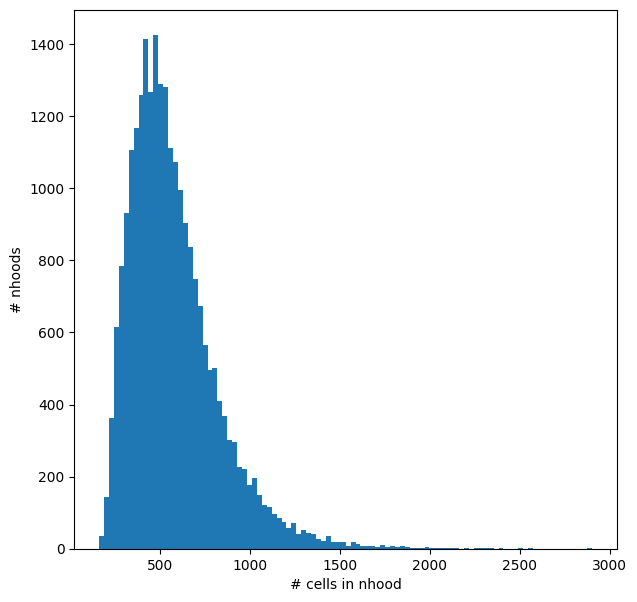

In [18]:
mdata["rna"][mdata["rna"].obs["nhood_ixs_refined"] != 0].obs[["nhood_ixs_refined", "nhood_kth_distance"]]
nhood_size = np.array(mdata["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods")


In [19]:
mdata = milo.count_nhoods(mdata, sample_col="sample_all")
# Reorder categories
# (by default, the last category is taken as the condition of interest)
mdata["rna"].obs["stage1"] = mdata["rna"].obs["stage1"].cat.reorder_categories(["healthy","early", "late","unknown"])
milo.da_nhoods(mdata, design="~stage1", model_contrasts="stage1early-stage1late", solver="pydeseq2")

Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.74 seconds.

Fitting dispersion trend curve...
/opt/software/miniconda3/envs/pertpy/lib/python3.12/site-packages/pydeseq2/dds.py:805: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 2.66 seconds.

Fitting LFCs...
... done in 3.79 seconds.

Calculating cook's distance...
... done in 0.16 seconds.

Replacing 5805 outlier genes.

Fitting dispersions...
... done in 2.17 seconds.

Fitting MAP dispersions...
... done in 2.05 seconds.

Fitting LFCs...
... done in 1.43 seconds.

Running Wald tests...
... done in 3.70 seconds.



Log2 fold change & Wald test p-value: stage1 early vs late
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0      32.320548        1.034703  1.479638  0.699295  0.484368  0.659108
1      10.822046        4.007086  1.106968  3.619876  0.000295  0.008636
2      22.457324        2.637218  1.203244  2.191757  0.028397  0.127873
3       9.547824        2.267093  1.490156  1.521380  0.128165  0.307338
4      27.901208        3.074865  1.371636  2.241750  0.024978  0.119198
...          ...             ...       ...       ...       ...       ...
24387  14.400274        0.379072  0.720212  0.526333  0.598657  0.748226
24388  10.807274        0.133147  0.688977  0.193253  0.846761  0.913349
24389   5.483766        0.881453  0.832394  1.058937  0.289628  0.492094
24390  19.157008       -2.002407  0.819672 -2.442937  0.014568  0.087259
24391   5.954736        0.488989  0.896373  0.545519  0.585396  0.738807

[24392 rows x 6 columns]


In [ ]:
milo.da_nhoods(mdata, design="~Status", model_contrasts="StatusCovid-StatusHealthy", solver="pydeseq2")
milo.da_nhoods(mdata, design="~Site+Status", model_contrasts="StatusCovid", solver="pydeseq2")

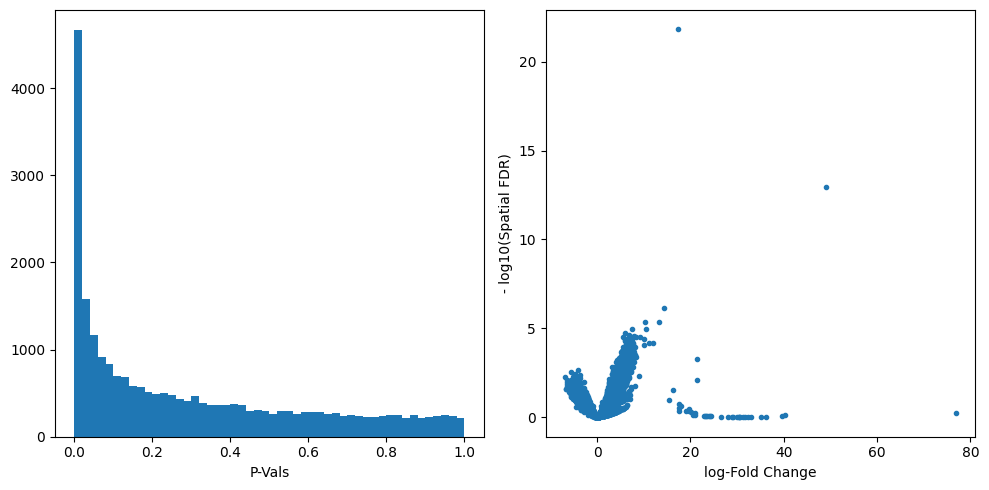

In [ ]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

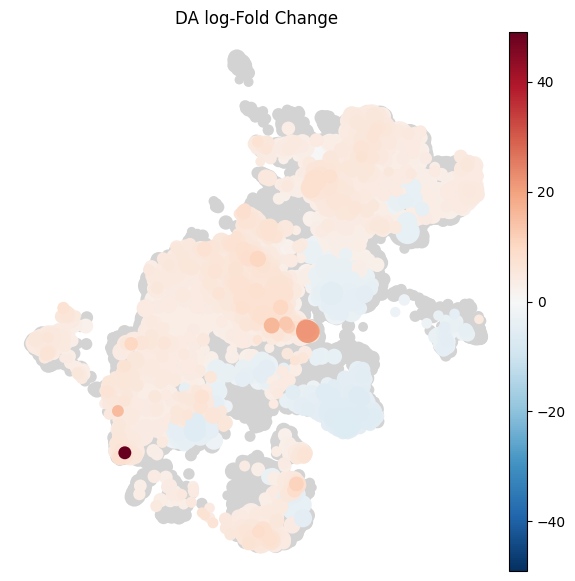

In [ ]:
milo.build_nhood_graph(mdata)
plt.rcParams["figure.figsize"] = [7, 7]
milo.plot_nhood_graph(
    mdata,
    alpha=0.1,  # SpatialFDR level (1%)
    min_size=1,  # Size of smallest dot
)

Text(0.5, 0, 'celltype fraction')

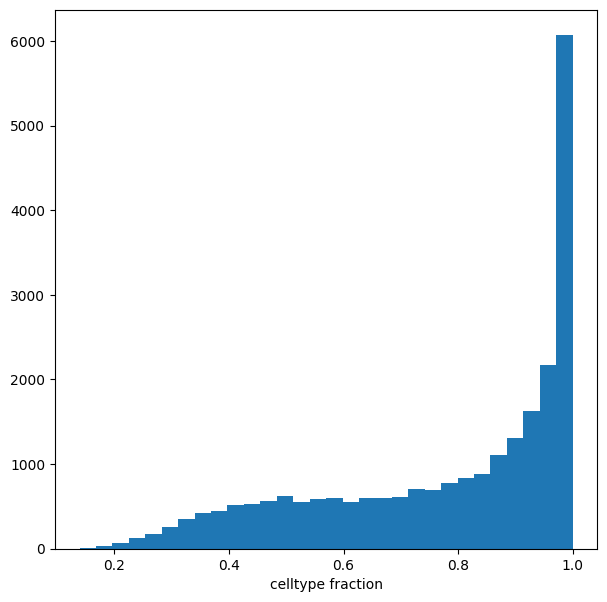

In [ ]:
milo.annotate_nhoods(mdata, anno_col="annotation2")
plt.hist(mdata["milo"].var["nhood_annotation_frac"], bins=30)
plt.xlabel("celltype fraction")

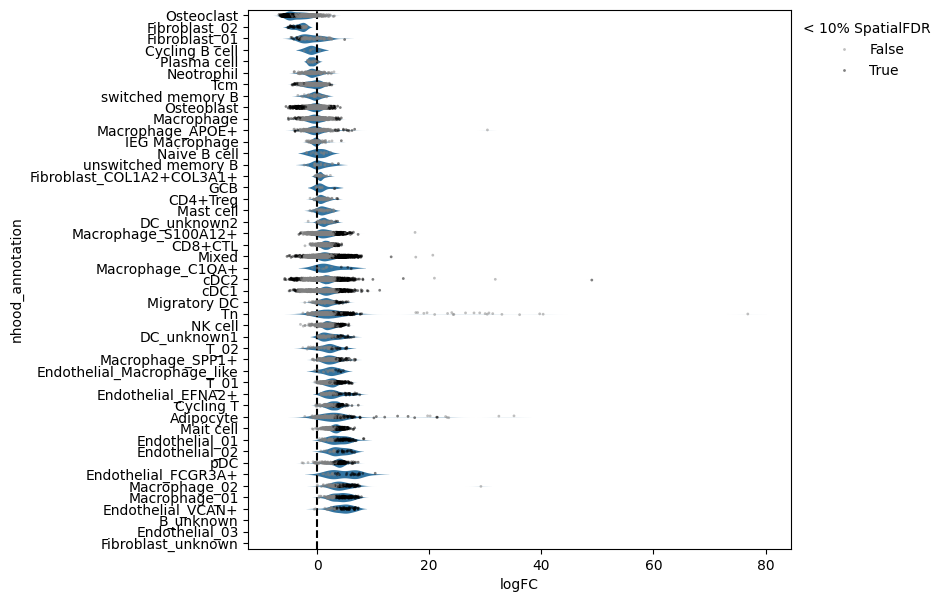

In [ ]:
mdata["milo"].var["nhood_annotation"] = mdata["milo"].var["nhood_annotation"].cat.add_categories("Mixed")
mdata["milo"].var.loc[mdata["milo"].var["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"
milo.plot_da_beeswarm(mdata, alpha=0.1)